In [2]:
import os
import sys
import inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
folder = "problems"
hd_dir = currentdir.split(folder)[0]

if hd_dir not in sys.path:
    sys.path.insert(0, hd_dir)

# from env.equation.equation import Equation
print(hd_dir)

env_dir = os.path.join(hd_dir, 'spaces', 'math_space', 'common')
print(env_dir)

if env_dir not in sys.path:
    sys.path.insert(0, env_dir)

/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/
/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/spaces/math_space/common


In [3]:
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

In [4]:
from envs.hs.model.model_main import ModelNet as Model
from settings.settings_main import Settings

/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/spaces/math_space/common/
/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/spaces/math_space/common/
/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/spaces/math_space/common/
/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/spaces/math_space/common/
/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/spaces/math_space/common/
/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/spaces/math_space/common/
/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/spaces/math_space/common/
/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/spaces/math_space/common/


### Add model, connection and device to settings: 

In [5]:
# make settings:
prefix = hd_dir
modelFileName = '../../../problems/1dTests/brusselator_simple'
model_path = '1dTests/brusselator_simple'
conn_name = "conn_base"
device_conf_name = "default"

model = Model()
model.io.loadFromFile(modelFileName)

settings =  Settings(model, conn_name, device_conf_name, "paths_hs_base", hd_prefix=prefix)


INFO:block_main.block_io:DefaultBound not set


Please enter password for user valdecar:
········


INFO:settings_main:device_conf_name
INFO:settings_main:default


In [8]:
# settings.paths['hs']
model.params
model.paramValues
model.defaultParamsIndex

5

### Progress:

In [6]:
from solvers.hs.remoterun.progresses.progress_notebook import ProgressNotebook

In [11]:
progress = ProgressNotebook(100, prefix='solving')
display(progress.progress)


### Run solver:

In [9]:

from solvers.hs.remoterun.remoterun import remoteProjectRun

In [12]:
clear_output()
test_name = settings.paths['model']['name']
bTest = widgets.Button(description="run %s " % (test_name))
def run(event):
    remoteProjectRun(settings, 1, progress)
bTest.on_click(run)
display(progress.progress)
display(bTest)
display(progress.progress)

INFO:remoterun:project_path
INFO:remoterun:1dTests/brusselator_simple
INFO:remoterun:project_name
INFO:remoterun:brusselator_simple
INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.2)
INFO:paramiko.transport:Authentication (keyboard-interactive) successful!
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace exists...
INFO:remoterun:Workspace OK.
INFO:remoterun:Creating/cleaning project folder: 
INFO:remoterun:Folder cleaned.
INFO:remoterun:Creating settings folders: 
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/paths exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings/paths alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/device_conf exists...
INFO:remoterun:folder /home/va

### Results:

In [13]:
out_dir = os.path.join(hd_dir, 'problems', model_path, "out")
listdir = os.listdir(out_dir)
mp4 = [os.path.join(out_dir, file_name) for file_name in listdir
       if 'mp4' in file_name]

##### .out:

In [14]:
print(listdir)

outs = [os.path.join(out_dir, file_name)
        for file_name in listdir
        if '.out' in file_name]
print(outs)
with open(outs[0]) as f:
    data = f.read()


['brusselator_simple_dom.txt', 'brusselator_simple-res0-U.out', 'brusselator_simple-res0.out', 'brusselator_simple.dom', 'params_plot.txt', 'libuserfuncs.so', 'brusselator_simple-res0-V.out', 'brusselator_simple.sh', 'userfuncs.h', 'brusselator_simple-plot1.mp4', 'brusselator_simple-res1.out', 'brusselator_simple-plot0.mp4', 'brusselator_simple.cpp']
['/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/brusselator_simple/out/brusselator_simple-res0-U.out', '/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/brusselator_simple/out/brusselator_simple-res0.out', '/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/brusselator_simple/out/brusselator_simple-res0-V.out', '/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/brusselator_simple/out/brusselator_simple-res1.out']


In [15]:
lines = data.split('\n')
result = {}

for line in lines:
    if ':' in line:
        key, val = line.split(':')
        result[key]=val[1:]
    else:
        val = line
        result[key] += val

In [16]:
import re

In [17]:
def gen(reuslt):
    for key in reuslt:
        step_0_0 = result[key].replace('...,',"")
        step_0_1 = re.subn(r'\[\s+',"[",step_0_0)[0]
        step_0 = re.subn(r'\.\s+',".0,",step_0_1)[0]
        step_1 = re.subn(r'\s+',",",step_0)[0]
        step_2 = step_1.replace('.]','.0]')
        step_3 = step_2.replace('[,','[')
        yield((key, eval(step_3)))

In [18]:
import numpy as np
result_t = dict([(float(key), val) for key, val in gen(result)])
time = [key for key in result_t]
result_x = np.array([result_t[key] for key in result_t]).T

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

##### U(x-fixed, t):

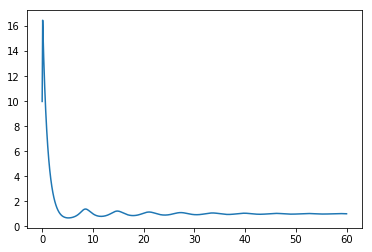

In [20]:
%matplotlib inline
def f(x):
    plt.plot(time, result_x[x])
w = interactive(f,x=(0,5,1))
display(w)

In [42]:
result_x

array([[  0.00000000e+00,   2.06940070e-01,   2.81882260e-01, ...,
          9.95086190e-01,   9.93937430e-01,   9.92861500e-01],
       [  1.00000000e-02,   2.07092350e-01,   2.81968170e-01, ...,
          9.95086210e-01,   9.93937450e-01,   9.92861520e-01],
       [  2.00000000e-02,   2.07548850e-01,   2.82225810e-01, ...,
          9.95086290e-01,   9.93937530e-01,   9.92861590e-01],
       [  9.98000000e+00,   1.64705428e+01,   1.49028631e+01, ...,
          1.00563151e+00,   1.00412596e+00,   1.00259925e+00],
       [  9.99000000e+00,   1.64713898e+01,   1.49034085e+01, ...,
          1.00563158e+00,   1.00412604e+00,   1.00259932e+00],
       [  1.00000000e+01,   1.64716723e+01,   1.49035904e+01, ...,
          1.00563161e+00,   1.00412606e+00,   1.00259934e+00]])